# 2. Exploratory Data Analysis

In order to address the business challenges faced by our client, an in-depth Exploratory Data Analysis (EDA) will be conducted on the dataset containing information on used cars. The goal of this analysis is to extract valuable insights that will inform the development of a predictive model for estimating the purchase price range of pre-owned vehicles.

In [2]:
#Load preprocessed data
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data
combined_final = pd.read_csv('Combined Dataset.csv')
combined_final.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg,brand
0,0,C Class,2020,30495,Automatic,1200,Diesel,2.0,145.0,61.4,Mercedes
1,1,C Class,2020,29989,Automatic,1000,Petrol,1.5,145.0,46.3,Mercedes
2,2,C Class,2020,37899,Automatic,500,Diesel,2.0,145.0,61.4,Mercedes
3,3,C Class,2019,30399,Automatic,5000,Diesel,2.0,145.0,61.4,Mercedes
4,5,C Class,2019,29899,Automatic,4500,Diesel,2.0,145.0,61.4,Mercedes


### **2.1. Average Price by Manufacturer Brand**

Price Dynamics across Manufacturing Brands: Analyze the variation in purchase prices across different manufacturers

In [4]:
price_mean = combined_final.groupby('brand')['price'].mean().sort_values(ascending = False)
price_mean

brand
Mercedes      24565.756267
Audi          22829.118308
Volkswagen    16833.822342
Skoda         14324.044397
Ford          12454.637847
Toyota        12362.515098
Name: price, dtype: float64

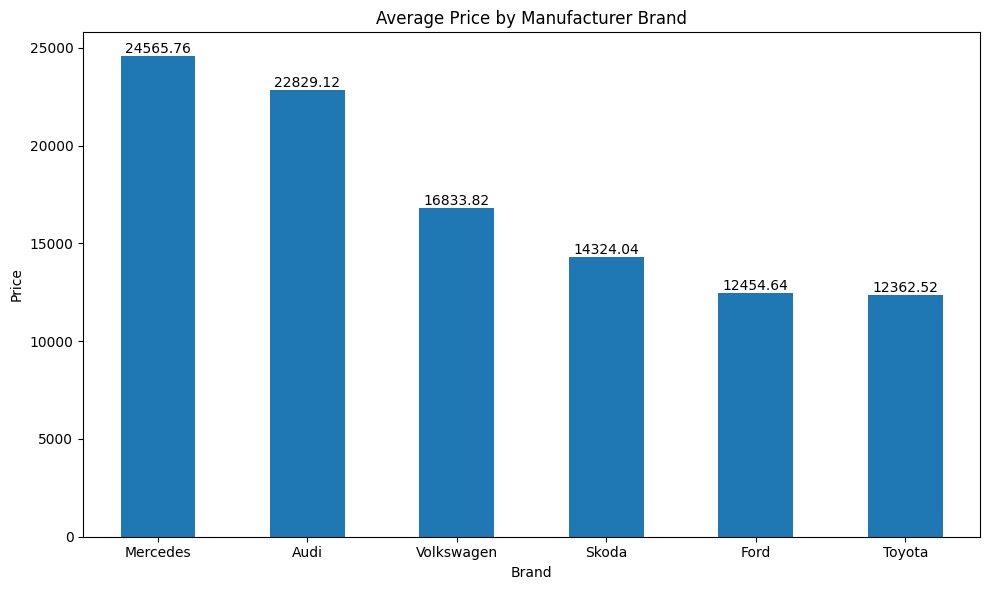

In [5]:
plt.figure(figsize=(10, 6))

# Generate a colormap with a unique color for each brand
# colors = plt.cm.tab10(np.arange(len(price_mean)))

# Create a bar plot with the specified colors
bars = price_mean.plot(kind='bar')

# Add labels on top of the bars
for bar, label in zip(bars.patches, price_mean.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')

plt.gca().set_xticklabels(price_mean.index, rotation=0, ha='center')

plt.title('Average Price by Manufacturer Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [6]:
price_mean = combined_final.groupby('brand')['price'].mean().sort_values(ascending = False)
price_mean

brand
Mercedes      24565.756267
Audi          22829.118308
Volkswagen    16833.822342
Skoda         14324.044397
Ford          12454.637847
Toyota        12362.515098
Name: price, dtype: float64

- Mercedes cars seem to command a relatively higher average resale price compared to other brands in the list.
-  This suggests that Mercedes vehicles, on average, retain their value well in the used car market.
- Potential buyers should be prepared for a higher upfront cost when considering a used Mercedes, but they may benefit from a higher resale value down the line.
- The resale value trends also highlight the significance of brand perception and reputation in the used car market, influencing pricing dynamics.

### **2.2. Average Car Sale Price by Manufacturing Year**

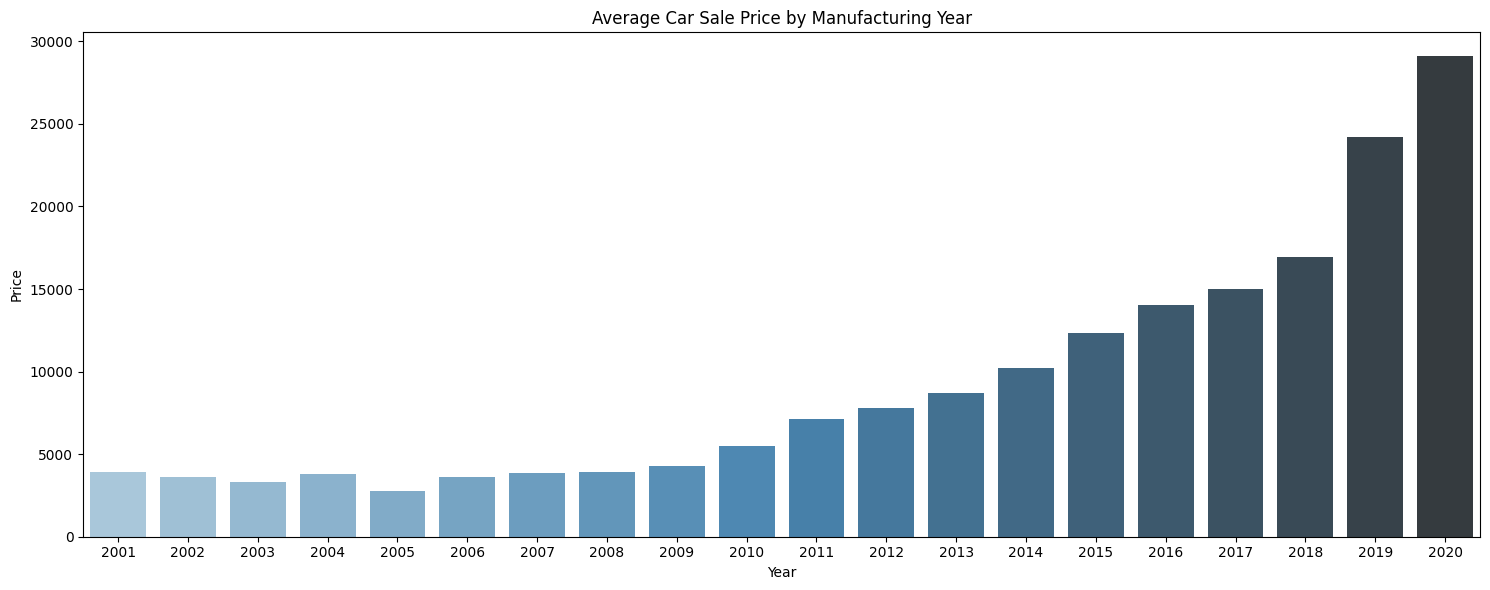

In [7]:
year_mean = combined_final.groupby('year')['price'].mean().sort_values()

#Plot yearly mean price 
plt.figure(figsize = (15,6))
sns.barplot(x='year', y='price', data=combined_final, errorbar=None, orient='v', palette='Blues_d')
plt.title('Average Car Sale Price by Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [8]:
combined_final[combined_final['year']==1970]

#Drop rows with year = 1970
combined_final.drop(combined_final[combined_final['year']==1970].index, inplace=True)

In [9]:
combined_final[combined_final['year']==2060]

#Drop rows with year = 1970
combined_final.drop(combined_final[combined_final['year']==2060].index, inplace=True)


The chart provides a visual representation of the average sales prices of cars by their manufacturing year.

**Increasing Trend in Sales Prices Over Time:**
- The data exhibits a generally increasing trend in sales prices as the manufacturing year becomes more recent. 
- Newer cars tend to have higher average sales prices, reflecting the common expectation that the value of a car decreases over time.

**There is a notable leap in sales prices for cars manufactured in the years 2018, 2019, and 2020.**
- This observation suggests that cars from these recent years are in high demand, possibly due to factors such as advanced features, improved safety standards, and enhanced performance. 
- The market's willingness to pay a premium for these newer models is reflected in the higher sales prices.

### **2.3. Top 5 Models by Sales Price**

model
G Class        98934.200000
 R8            97652.214286
 Q8            60115.014493
 California    57593.866667
 RS6           55963.871795
Name: price, dtype: float64

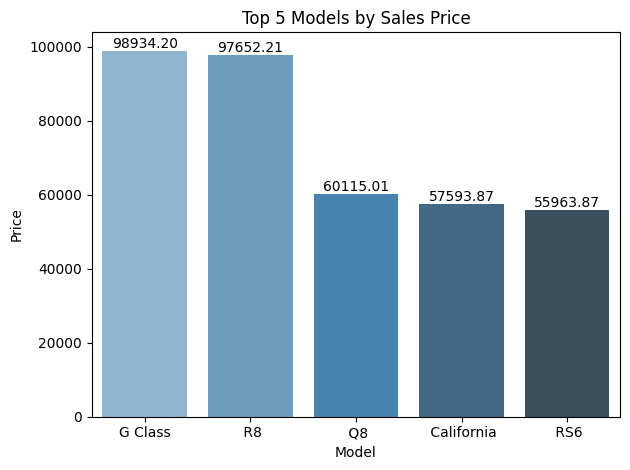

In [10]:
#FInd top 5 models with highest mean price
top_models = combined_final.groupby('model')['price'].mean().sort_values(ascending = False).head(5)
display(top_models)

#Plot top 5 models with highest mean price
bars = sns.barplot(x='model', y='price', data=combined_final, order=top_models.index, errorbar=None, orient='v', palette='Blues_d')

#Add bar label for each model
for bar, label in zip(bars.patches, top_models.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')

plt.title('Top 5 Models by Sales Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

The chart provides a visual representation of the top 5 models by sales price. By, analyzing the top 5 models by sales price, we can identify the most expensive cars in the listing. 

The top model by sales price are Mercedes-Benz G-Class with average sales price of 98.934 €. 

### **2.4. Top 5 Models by Listing Counts**

model
Focus      6902
Fiesta     6444
C Class    6099
 Golf      4774
 Polo      3203
Name: count, dtype: int64

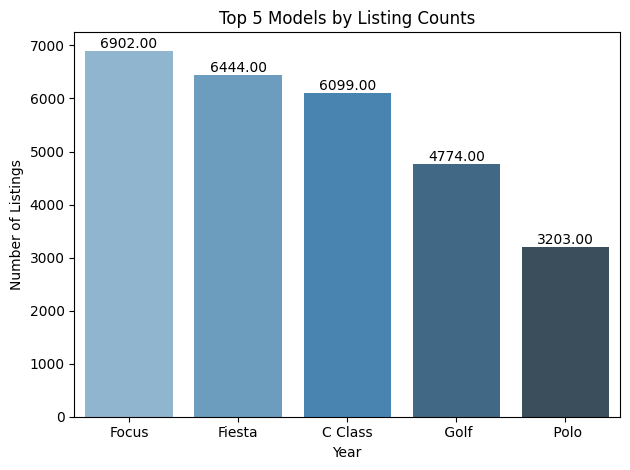

In [11]:
#Count top 5 models count

model_counts = combined_final['model'].value_counts().sort_values(ascending = False).head(5)
display(model_counts)

#Plot top 5 models with highest count
bars = sns.barplot(x=model_counts.index, y=model_counts.values, data=combined_final, order=model_counts.index, errorbar=None, orient='v', palette='Blues_d')

#Add bar label for each model
for bar, label in zip(bars.patches, model_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')
    
plt.title('Top 5 Models by Listing Counts')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

Ford Focus is the most common model in the listing with 1.300 listings.

### **2.5. Car Features Correlations**

<function matplotlib.pyplot.show(close=None, block=None)>

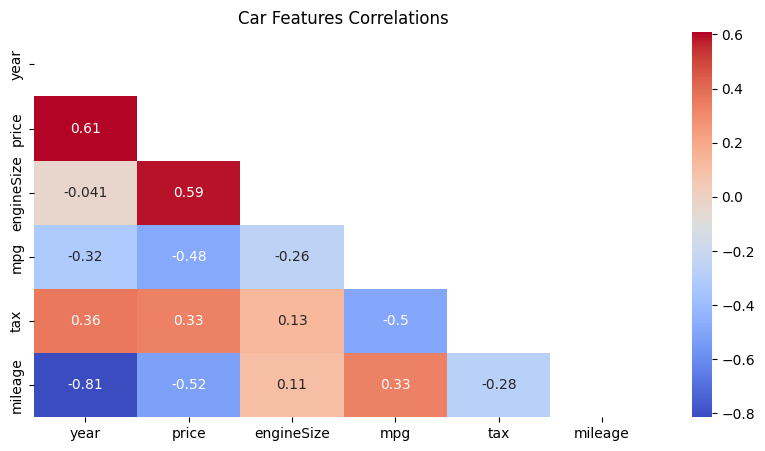

In [12]:
#Plot feature correlations 

plt.figure(figsize = (10,5))
data_corr = combined_final[['year', 'price', 'engineSize', 'mpg', 'tax', 'mileage']].corr('spearman')
matrix = np.triu(data_corr)
sns.heatmap(
    data_corr,
    annot = True,
    cmap = 'coolwarm',
    mask = matrix
)

plt.title('Car Features Correlations')

plt.show

From the correlation matrix, we can see that the features with the highest correlation with the price are the year of manufacture, the mileage, the engine power, and the engine capacity.

## Improvement on EDA

- Focus on brand, top/bottom 1 model
- Based in transmission type, and manufacturer, price
- Count of totals of each brand, and year
- count average mileage of used car
- mileage vs price
- milage vs mpg, and price, whic cars are cheaper 
- hybrid tax == 0, add article about hybrid tax
- avoid pie chart


- Characteristics of higher priced cars
- Characteristics of lower priced cars
    - Mileage
    - Year
    - mpg

price using mean or median